# Exploratory Data Analysis of Data Analyst LinkedIn Job Postings in Jakarta 
---

# **Overview**

The main goal of this project is to demonstrate the use of web-scraping method in obtaining useful data to be further analyzed using Python. 

We obtained the data of from the previous step which is using web scraper utilizing **selenium** library to get the data from LinkedIn. The data is about job postings of Data Analyst in Jakarta area. We will do some exploratory data analysis to get some insights from the data.

The data we'll be using on this analysis is scraped on October 1st 2023 @ around 16:00. The current list on LinkedIn may already changed or unavailable.


Key questions that we will answer in this step are: 
- What are the most common words in the job title?
- What are the most common words in the job description?

*Disclaimer*: 
- This project is for educational purposes only. 
- The data used in this project are publicly available on LinkedIn with no intention of commercial use.
- The web scraper developed for this project does not access LinkedIn website using an account, instead it's just using the search feature available on the official webpage
- The developed program does not intend to cause any harm to LinkedIn or any related parties.

# 1. Import Libraries and Load Data

In [30]:
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [31]:
#Load Data
df = pd.read_csv('/Users/Dwika/My Projects/Modul 3 Purwadhika/_PORTO3-WebScraper/Data_Analyst_Salary-WebScraper/DATA OUTPUT/EDA_linkedin_jobdetails.csv')

In [32]:
df.head()

,Unnamed: 0,Job Title,Company Name,Location,Posted Date,Job Level,Job Type,Job Function,Industry,Job Description
0,0,Data Analyst - Central Data Platform,Gojek,Jakarta,2023-09-12,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",About The Role\n\nThe role is Associate Data A...
1,1,Data Analyst,Gojek,Jakarta,2023-09-19,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet","About The Role\n\nAs our Data Analyst, you’ll ..."
2,2,Data Analyst - Subscription,Gojek,Jakarta,2023-09-19,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",The role is Associate Data Analyst (DA) workin...
3,3,Data Analyst - Transport (Jakarta),Gojek,Jakarta,2023-09-13,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet","If you’re a data analyst at heart, this role i..."
4,4,Data Analyst - Campaign Management,Gojek,Jakarta,2023-09-26,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",The Shared Consumer Platform team at GoTo is i...


# 2. Data Cleaning 

In [33]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       200 non-null    int64 
 1   Job Title        200 non-null    object
 2   Company Name     200 non-null    object
 3   Location         200 non-null    object
 4   Posted Date      200 non-null    object
 5   Job Level        143 non-null    object
 6   Job Type         144 non-null    object
 7   Job Function     144 non-null    object
 8   Industry         144 non-null    object
 9   Job Description  144 non-null    object
dtypes: int64(1), object(9)
memory usage: 15.8+ KB


We'll only be using data that are available in all columns, so we will drop rows with any missing values.

In [34]:
#Drop missing values & unused column
df = df.dropna().drop(columns=['Unnamed: 0'])
df

,Job Title,Company Name,Location,Posted Date,Job Level,Job Type,Job Function,Industry,Job Description
0,Data Analyst - Central Data Platform,Gojek,Jakarta,2023-09-12,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",About The Role\n\nThe role is Associate Data A...
1,Data Analyst,Gojek,Jakarta,2023-09-19,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet","About The Role\n\nAs our Data Analyst, you’ll ..."
2,Data Analyst - Subscription,Gojek,Jakarta,2023-09-19,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",The role is Associate Data Analyst (DA) workin...
3,Data Analyst - Transport (Jakarta),Gojek,Jakarta,2023-09-13,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet","If you’re a data analyst at heart, this role i..."
4,Data Analyst - Campaign Management,Gojek,Jakarta,2023-09-26,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",The Shared Consumer Platform team at GoTo is i...
...,...,...,...,...,...,...,...,...,...
139,Data management engineer,ADVANCE.AI,Jakarta,2023-05-04,Tingkat pemula,Penuh waktu,Teknologi Informasi,Manufaktur Kendaraan Bermotor,Why choose iZeno?\n\n\n\n\niZeno was founded i...
140,(FinTech Unicorn) Credit Risk Data Analyst - A...,MatchaTalent,Jakarta,2023-09-24,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",Are you ready to embark on an exciting journey...
141,Business Information Analyst,SKF Group,"Jakarta Raya, Indonesia",2023-09-06,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",Crossover is the world's #1 source of full-tim...
142,People Analytics Specialist – Bangkok based,Agoda,Area DKI Jakarta,2023-09-28,Senior tingkat menengah,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",Company Description: PT. BSR Indonesia provide...


The job description contains rich-text formatting, so it may contain different format in each rows and make it harder to collect.

In [35]:
#remove job description rich text formatting
df['Job Description'] = df['Job Description'].str.replace('\n', ' ')

In [36]:
df

,Job Title,Company Name,Location,Posted Date,Job Level,Job Type,Job Function,Industry,Job Description
0,Data Analyst - Central Data Platform,Gojek,Jakarta,2023-09-12,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",About The Role The role is Associate Data Ana...
1,Data Analyst,Gojek,Jakarta,2023-09-19,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet","About The Role As our Data Analyst, you’ll be..."
2,Data Analyst - Subscription,Gojek,Jakarta,2023-09-19,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",The role is Associate Data Analyst (DA) workin...
3,Data Analyst - Transport (Jakarta),Gojek,Jakarta,2023-09-13,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet","If you’re a data analyst at heart, this role i..."
4,Data Analyst - Campaign Management,Gojek,Jakarta,2023-09-26,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",The Shared Consumer Platform team at GoTo is i...
...,...,...,...,...,...,...,...,...,...
139,Data management engineer,ADVANCE.AI,Jakarta,2023-05-04,Tingkat pemula,Penuh waktu,Teknologi Informasi,Manufaktur Kendaraan Bermotor,Why choose iZeno? iZeno was founded in 200...
140,(FinTech Unicorn) Credit Risk Data Analyst - A...,MatchaTalent,Jakarta,2023-09-24,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",Are you ready to embark on an exciting journey...
141,Business Information Analyst,SKF Group,"Jakarta Raya, Indonesia",2023-09-06,Tingkat pemula,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",Crossover is the world's #1 source of full-tim...
142,People Analytics Specialist – Bangkok based,Agoda,Area DKI Jakarta,2023-09-28,Senior tingkat menengah,Penuh waktu,Teknologi Informasi,"Teknologi, Informasi, dan Internet",Company Description: PT. BSR Indonesia provide...


In [37]:
#convert posted date to datetime
df['Posted Date'] = pd.to_datetime(df['Posted Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 143
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Job Title        143 non-null    object        
 1   Company Name     143 non-null    object        
 2   Location         143 non-null    object        
 3   Posted Date      143 non-null    datetime64[ns]
 4   Job Level        143 non-null    object        
 5   Job Type         143 non-null    object        
 6   Job Function     143 non-null    object        
 7   Industry         143 non-null    object        
 8   Job Description  143 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 11.2+ KB


In [38]:
#Create a new columns for key skills contained in job description column

df['need_Python'] = df['Job Description'].str.contains('Python', case=False) 
df['need_SQL'] = df['Job Description'].str.contains('SQL', case=False) 
df['need_Tableau'] = df['Job Description'].str.contains('Tableau', case=False) 
df['need_ML'] = df['Job Description'].str.contains('Machine Learning', case=False) 

# 3. Exploratory Data Analysis

In [161]:
#set plot style
sns.set_style('whitegrid')

## Top 5 Industries with Most Job Postings

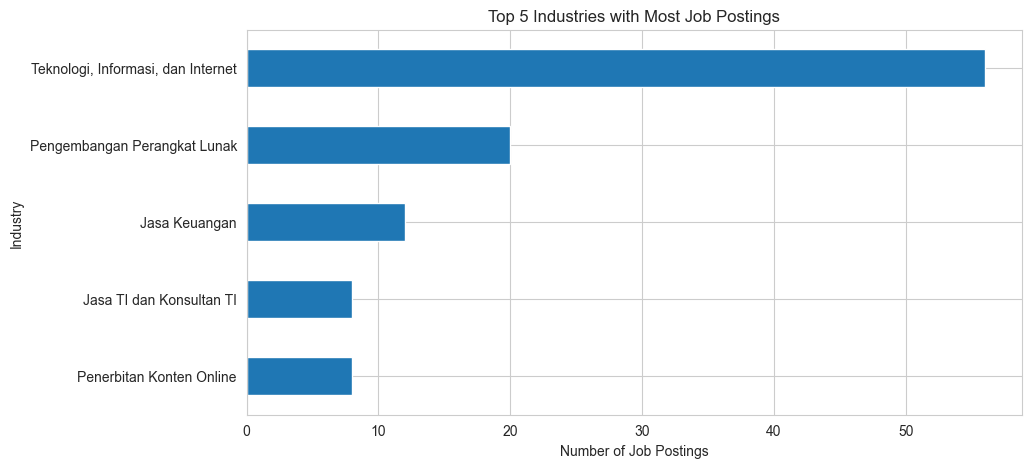

In [162]:
# Plot Top 5 Industries with Most Job Postings
plt.figure(figsize=(10,5))
df['Industry'].value_counts().head(5).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 5 Industries with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Industry')
plt.show()


## Top 10 Companies with Most Job Postings for Data Analyst in Jakarta

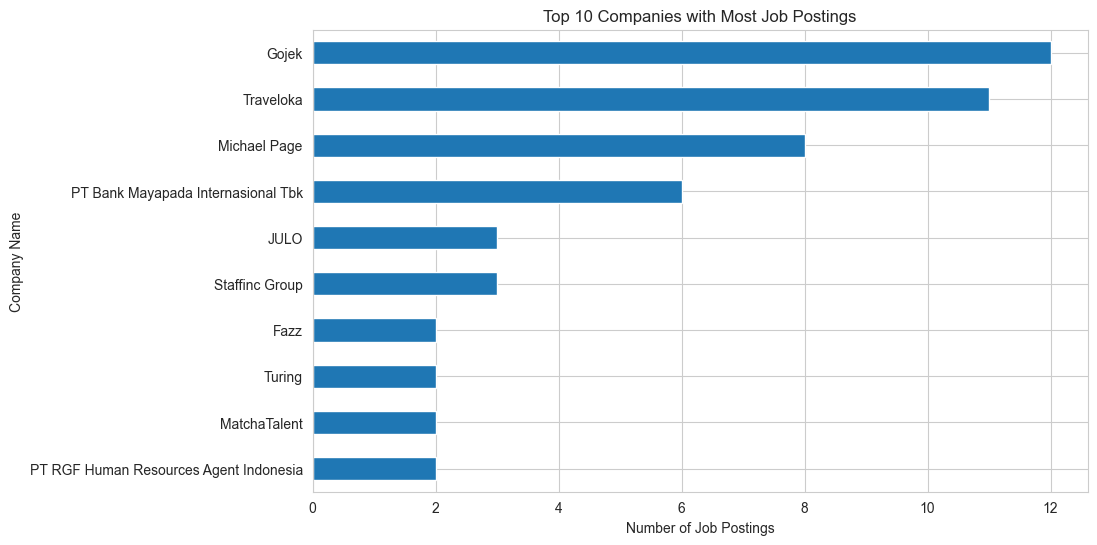

In [163]:
#Plot top 10 companies with most job postings
plt.figure(figsize=(10,6))
df['Company Name'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company Name')
plt.show()


## Number of Job Levels available

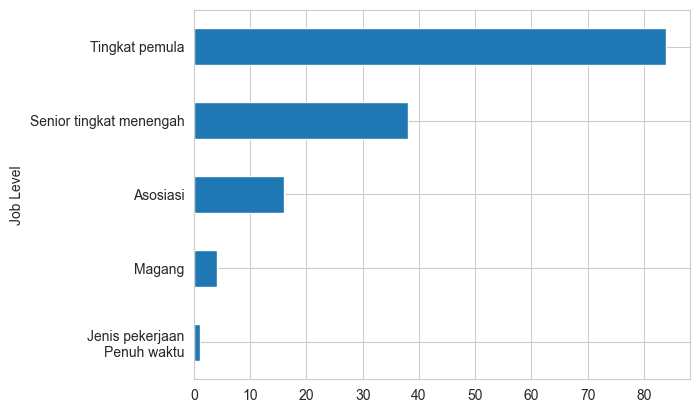

In [164]:
#Plot the number of job level
df['Job Level'].value_counts().plot(kind='barh').invert_yaxis()

> **Entry level jobs** are the most common job level available for Data Analyst in Jakarta area. This is followed by **Mid-Senior and Associate** level jobs.

## Relevant Skills for Data Analyst in Jakarta

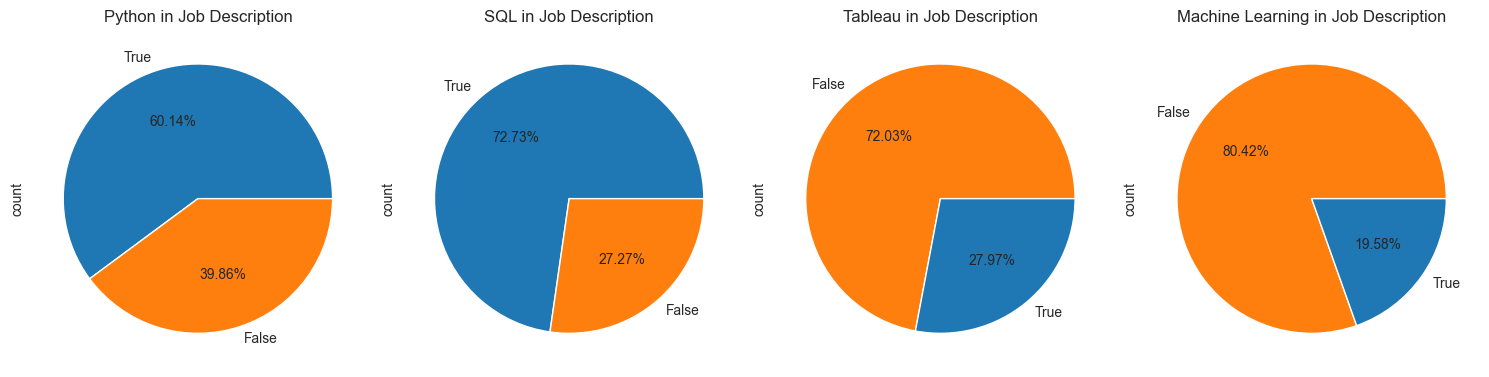

In [181]:
#Plot job skills pie chart
numerical_cols = ['contains_Python', 'contains_SQL', 'contains_Tableau', 'contains_ML']

plt.figure(figsize=(15, 15))

plt.subplot(1, 4, 1)
df[numerical_cols[0]].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=[colours[v] for v in mylabels])
plt.title('Python in Job Description')


plt.subplot(1, 4, 2)
df[numerical_cols[1]].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=[colours[v] for v in mylabels])
plt.title('SQL in Job Description')



plt.subplot(1, 4, 3)
df[numerical_cols[2]].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['C1', 'C0'])
plt.title('Tableau in Job Description')


plt.subplot(1, 4, 4)
df[numerical_cols[3]].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['C1', 'C0'])
plt.title('Machine Learning in Job Description')



plt.tight_layout()
plt.show()

## Trends of job postings

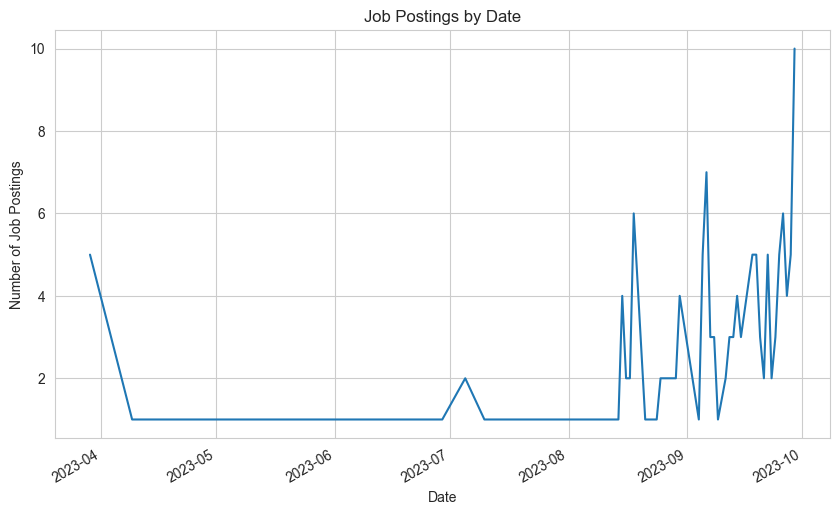

In [270]:
#Plot time series of job postings
plt.figure(figsize=(10,6))
df['Posted Date'].value_counts().sort_index().plot(kind='line')
plt.title('Job Postings by Date')
plt.xlabel('Date')
plt.ylabel('Number of Job Postings')
plt.show()


## Create Wordcloud

In [145]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [266]:
#Create a string of all job description
 
comment_words = ''

#Setup stopwords and exclude irrelevant words
stopwords = set(STOPWORDS)
stopwords.update(["experience", "build", "develop", "will", "skill", "company", "work", "working", "tool", "tools", "team", "teams", "skills", "ability", "knowledge", "strong", "years", "year", "degree", "including", "using", "provide", "new", "help", "support", "solutions", "one", "based", "well", "etc", "etc.", "also", "within", "ensure",])
 
# iterate through the description column
for val in df['Job Description']:
    

    # typecaste each val to string
    val = str(val)
    
    # split the value
    tokens = val.split()
     
    #val.replace("Business", "") 
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (300, 100), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()